# **1. Perkenalan Dataset**


**Spam email Dataset**  

Dataset ini berisi kumpulan pesan teks email, yang diberi label sebagai spam atau tidak spam. Setiap pesan email dilabeli dengan label biner, di mana "1" menunjukkan bahwa email tersebut adalah spam, dan "0" menunjukkan bahwa email tersebut tidak spam (ham). Dataset ini dimaksudkan untuk digunakan dalam pelatihan dan evaluasi model klasifikasi email spam.

Sumber: [Kaggle](https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from wordcloud import WordCloud

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [37]:
df = pd.read_csv("spam ham emails.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [38]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [40]:
print("Missing data pada dataset:")
print(df.isna().sum())

Missing data pada dataset:
text    0
spam    0
dtype: int64


In [41]:
print("Duplicated data pada dataset:")
print(df.duplicated().sum())

Duplicated data pada dataset:
33


In [42]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


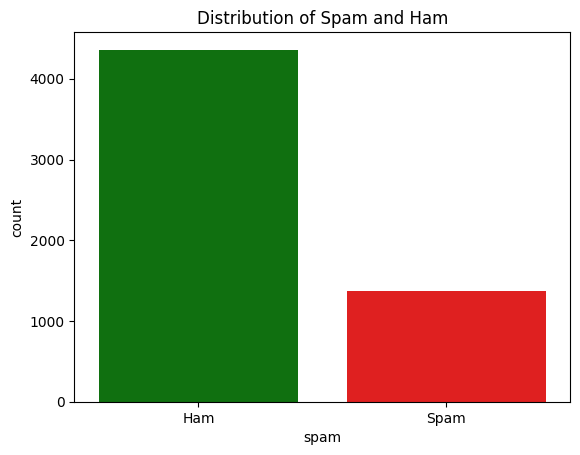

In [43]:
sns.countplot(x='spam', data=df, hue='spam', palette={0: 'green', 1: 'red'}, legend=False)
plt.title('Distribution of Spam and Ham')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

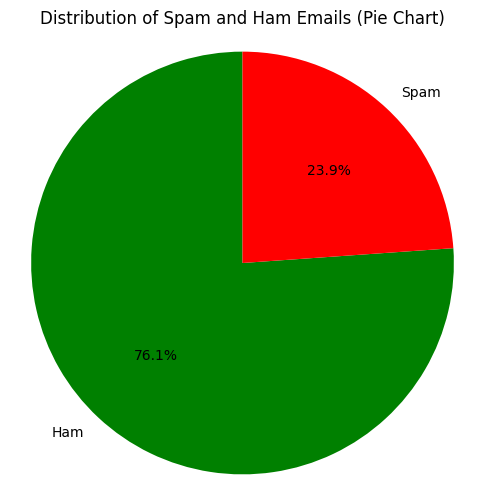

In [44]:
plt.figure(figsize=(6, 6))
plt.pie(df['spam'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of Spam and Ham Emails (Pie Chart)')
plt.axis('equal')
plt.show()

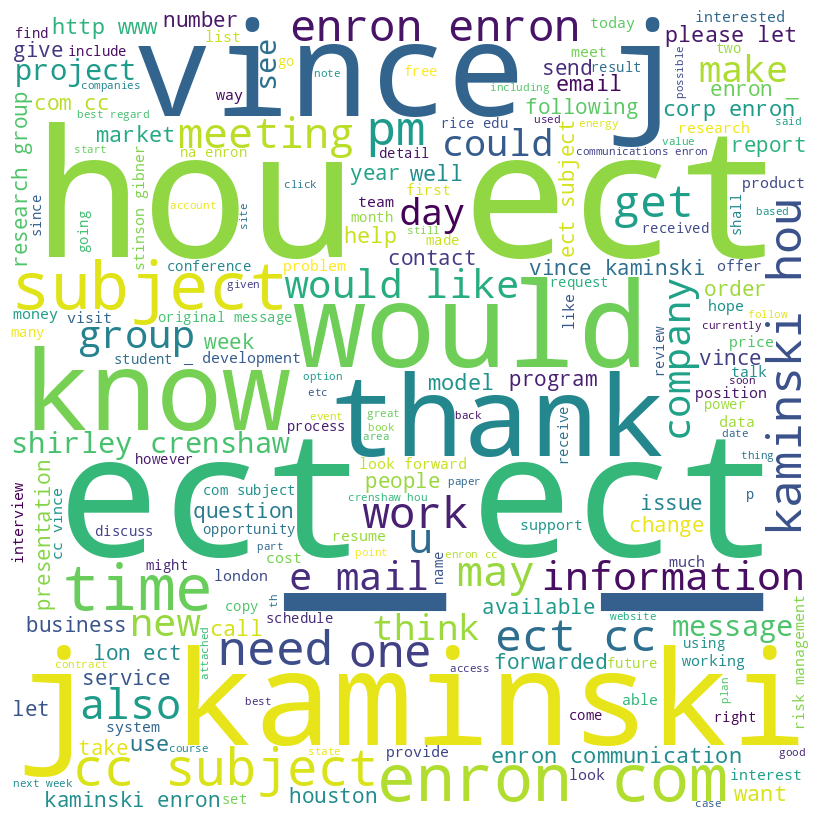

In [45]:
all_text = ' '.join(df['text'].astype(str).str.lower())

stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [46]:
df = df.drop_duplicates()

print("Duplicated data pada dataset:")
print(df.duplicated().sum())

Duplicated data pada dataset:
0


In [47]:
n = df['spam'].value_counts().min()
df_balanced = df.sample(frac=1).groupby('spam').head(n)

print(df_balanced['spam'].value_counts())

spam
0    1368
1    1368
Name: count, dtype: int64


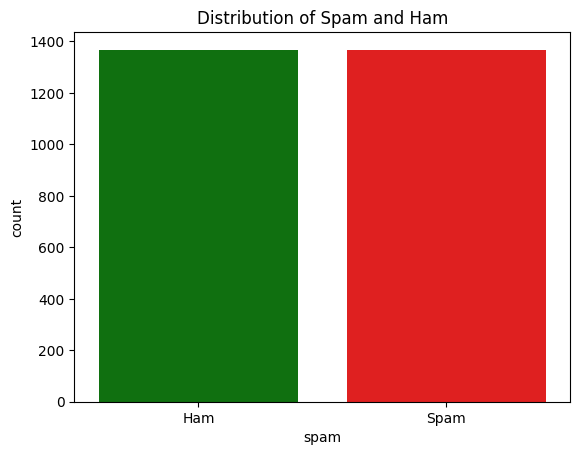

In [48]:
sns.countplot(x='spam', data=df_balanced, hue='spam', palette={0: 'green', 1: 'red'}, legend=False)
plt.title('Distribution of Spam and Ham')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

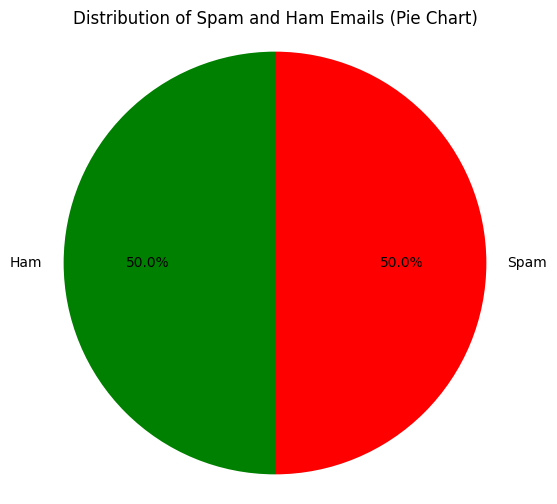

In [49]:
plt.figure(figsize=(6, 6))
plt.pie(df_balanced['spam'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of Spam and Ham Emails (Pie Chart)')
plt.axis('equal')
plt.show()

In [50]:
x = df['text'].astype(str).str.lower()

y = df['spam'].astype(float)

x.info()
print("\n")
y.info()

<class 'pandas.core.series.Series'>
Index: 5695 entries, 0 to 5727
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5695 non-null   object
dtypes: object(1)
memory usage: 89.0+ KB


<class 'pandas.core.series.Series'>
Index: 5695 entries, 0 to 5727
Series name: spam
Non-Null Count  Dtype  
--------------  -----  
5695 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


In [51]:
x = x.apply(lambda text: " ".join([word for word in text.split() if word not in stop_words]))

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(x)
x_sequences = tokenizer.texts_to_sequences(x)

print("\nAfter stopword removal and re-tokenization:")
x_sequences[0]


After stopword removal and re-tokenization:


[5,
 5669,
 1,
 411,
 1654,
 3772,
 355,
 787,
 4273,
 52,
 61,
 299,
 6161,
 27,
 9056,
 100,
 4383,
 724,
 5922,
 5923,
 1559,
 201,
 65,
 2033,
 149,
 1725,
 1873,
 7877,
 1586,
 4168,
 52,
 1,
 572,
 302,
 5670,
 6435,
 7878,
 379,
 100,
 252,
 760,
 34,
 739,
 4384,
 2918,
 4514,
 4274,
 61,
 1873,
 347,
 667,
 572,
 149,
 760,
 103,
 907,
 1165,
 4385,
 983,
 214,
 189,
 2375,
 3406,
 452,
 1909,
 4169,
 52,
 1138,
 1024,
 724,
 1315,
 589,
 2433,
 720,
 97,
 573,
 60,
 168,
 4515,
 343,
 201,
 573,
 336,
 845,
 4386,
 66,
 724,
 4052,
 178,
 396,
 34,
 196,
 4387,
 347,
 1262,
 4,
 65,
 3618,
 1233,
 381,
 1994,
 1166,
 170,
 1891,
 621,
 332,
 1359,
 1926,
 4516,
 1182,
 803,
 2270,
 88,
 577,
 137]

In [52]:
vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(x)